In [22]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary libraries for 3D plotting
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

In [23]:
# Load the dataset
data = pd.read_csv('CVD_cleaned.csv')

# Display the first few rows of the dataset
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


# <span style="color:#E888BB; font-size: 1%;">EXPLORATORY DATA ANALYSIS</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/3683056/pexels-photo-3683056.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>EXPLORATORY DATA ANALYSIS </span></b> </div>

<br>



## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/3683041/pexels-photo-3683041.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> Univariate Analysis </span></b> </div>



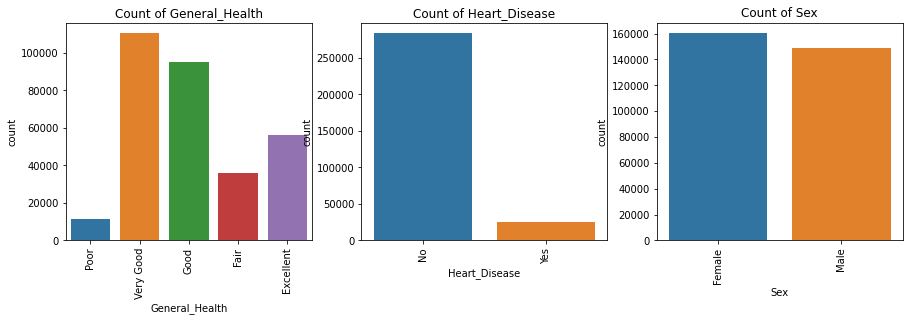

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your list of categorical features
categorical_features = ['General_Health', 'Heart_Disease', 'Sex']

# Create a single figure with multiple subplots
fig, axes = plt.subplots(1, len(categorical_features), figsize=(15, 4))

# Loop through the categorical features and create count plots in each subplot
for i, feature in enumerate(categorical_features):
    sns.countplot(data=data, x=feature, ax=axes[i])
    axes[i].set_title('Count of ' + feature)
    axes[i].tick_params(axis='x', labelrotation=90)

# Display the figure with all subplots
plt.show()


### 🔍 Interpretation of Results:

- 😊 **General_Health**: Most patients describe their general health as "Good", with "Very Good" being the second most common response. Fewer patients rate their health as "Fair" or "Poor".

- ❤️ **Heart_Disease**: A significant majority of patients do not have heart disease. Only a small proportion of patients have heart disease.

- ♀️♂️ **Sex**: There are slightly more female patients than male patients in the dataset.


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/3683041/pexels-photo-3683041.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> Bivariate Analysis </span></b> </div>

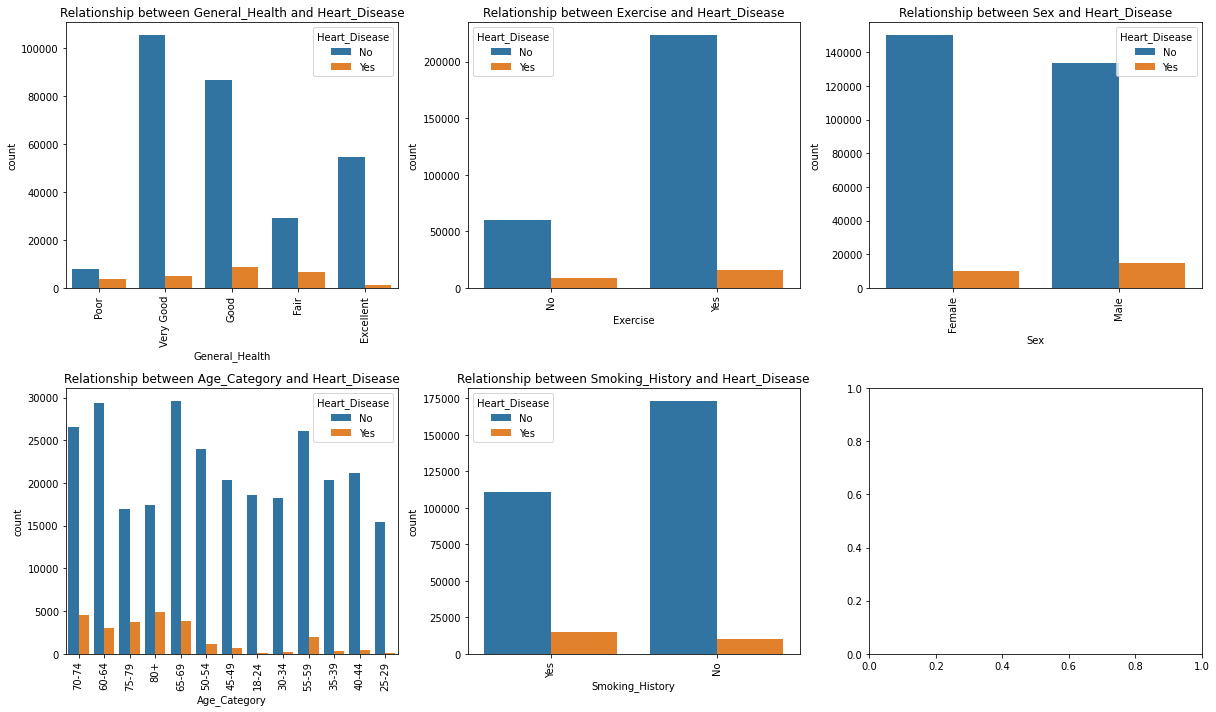

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selected variables and disease conditions
selected_variables = ['General_Health', 'Exercise', 'Sex', 'Age_Category', "Smoking_History"]
disease_conditions = ['Heart_Disease']

# Calculate the number of subplots needed
num_plots = len(selected_variables) * len(disease_conditions)

# Create subplots in a 2x2 grid
fig, axes = plt.subplots(2, 3, figsize=(17, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

for i, disease in enumerate(disease_conditions):
    for j, variable in enumerate(selected_variables):
        sns.countplot(data=data, x=variable, hue=disease, ax=axes[i * len(selected_variables) + j])
        axes[i * len(selected_variables) + j].set_title('Relationship between ' + variable + ' and ' + disease)
        axes[i * len(selected_variables) + j].tick_params(axis='x', labelrotation=90)

# Adjust subplot layout
plt.tight_layout()

# Display the subplots
plt.show()


### 🔍 Interpretation of Results:

- ❤️ `Heart_Disease`:

  - Heart disease is more prevalent in patients who rate their general health as "Poor" or "Fair".🩹🔻
  - It is slightly more common in patients who do not exercise. 🏋️‍♂️❌
  - Males are more likely to have heart disease than females. 👨‍⚕️>👩‍⚕️
  - The prevalence of heart disease increases with age, with it being most common in the 80+ age category. 🧓🔝
  - Heart disease is also more common in patients with a history of smoking. 🚬🔺




## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/3683041/pexels-photo-3683041.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> Multivariate Analysis </span></b> </div>



### <b> <span style='color:#FF8551'>|</span> BMI category</b>

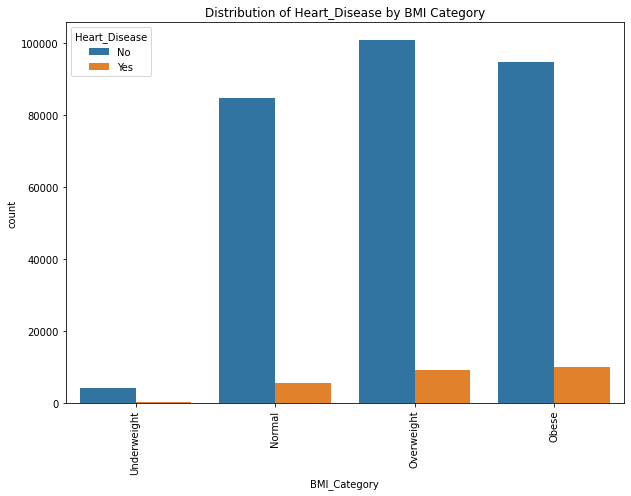

In [26]:
# Analyze the relationship between disease conditions, BMI, and exercise

# Creating a new BMI category
data['BMI_Category'] = pd.cut(data['BMI'], bins=[0,18.5,25,30,100], labels=['Underweight','Normal','Overweight','Obese'])

# plt.figure(figsize=(10, 7))
# sns.countplot(data=data, x='BMI_Category', hue='Exercise')
# plt.title('Distribution of BMI Category by Exercise')
# plt.xticks(rotation=90)
# plt.show()

for disease in disease_conditions:
    plt.figure(figsize=(10, 7))
    sns.countplot(data=data, x='BMI_Category', hue=disease)
    plt.title('Distribution of ' + disease + ' by BMI Category')
    plt.xticks(rotation=90)
    plt.show()


### 🔍 Interpretation of Results:

- The relationship between `BMI Category` and the disease conditions (`Heart_Disease`) shows the following patterns:

  - For ❤️ `Heart_Disease`, the prevalence is higher among those with "Overweight" and "Obese" BMI. This suggests that these conditions may be associated with higher BMI levels.




# <span style="color:#E888BB; font-size: 1%;">CORRELATION MATRIX</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/3683056/pexels-photo-3683056.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>CORRELATION MATRIX </span></b> </div>

### <b>I <span style='color:#FF8551'>|</span> Data Preprocessing</b>


In [27]:
# Re-import the dataset
data = pd.read_csv('CVD_cleaned.csv')

# Mapping for Diabetes
diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0,
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)

# One-hot encoding for Sex
data = pd.get_dummies(data, columns=['Sex'])

# Convert remaining categorical variables with "Yes" and "No" values to binary format for correlation computation
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History','Exercise']

for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

# Ordinal encoding for General_Health, Checkup, Age_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}
data['General_Health'] = data['General_Health'].map(general_health_mapping)

checkup_mapping = {
    'Never': 0,
    '5 or more years ago': 0.2,
    'Within the past 5 years': 1,
    'Within the past 2 years': 2,
    'Within the past year': 4

}
data['Checkup'] = data['Checkup'].map(checkup_mapping)


age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)


# Display the first few rows of the cleaned dataset
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Sex_Female,Sex_Male
0,0,2.0,0,0,0,0,0,0,1,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0,1,0
1,3,4.0,0,1,0,0,0,1,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0,1,0
2,3,4.0,1,0,0,0,0,1,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0,1,0
3,0,4.0,1,1,0,0,0,1,0,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0,0,1
4,2,4.0,0,0,0,0,0,0,0,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0,0,1


In [28]:
# Remove duplicate rows
data = data.drop_duplicates()

### <b>II <span style='color:#FF8551'>|</span> Correlation Matrix</b>

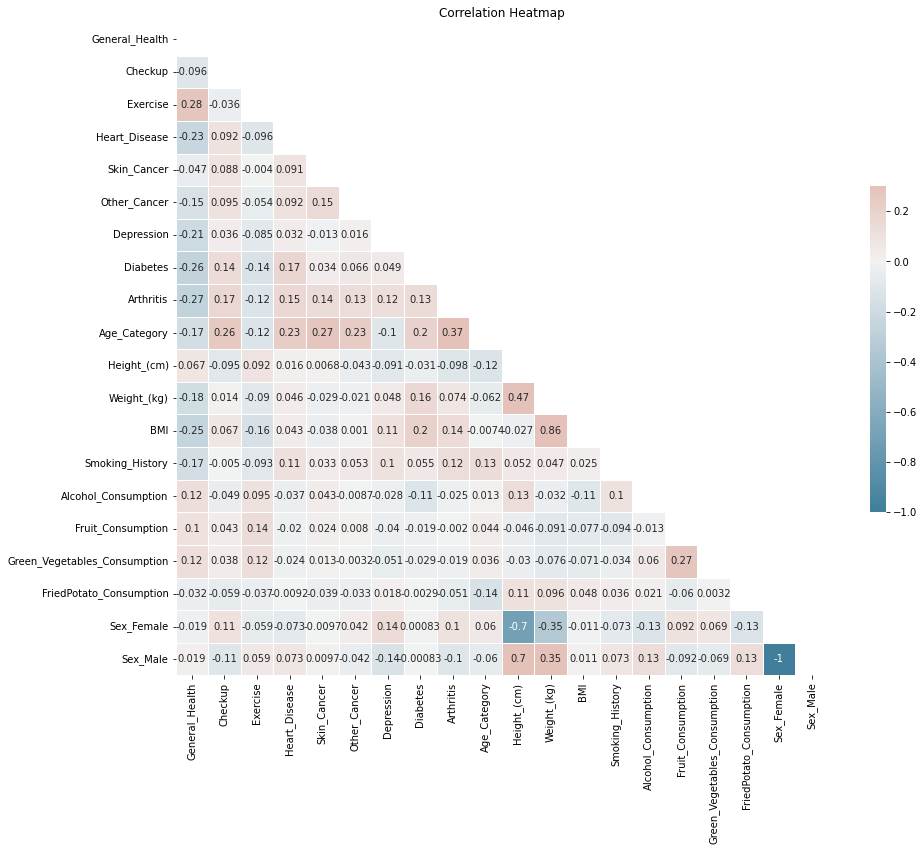

In [29]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap')
plt.show()

### 🔍 Interpretation of Results:

- 📊 The correlation heatmap provides a visual representation of the correlation between different features in the dataset. Each square shows the correlation between the variables on each axis. Correlation values range from -1 to 1. Values closer to 1 represent a strong positive correlation, values closer to -1 represent a strong negative correlation, and values around 0 represent no correlation.

- 🔎 Here are some observations from the heatmap:


  
  - 😔 `General_Health` has a negative correlation with `Heart_Disease`. This suggests that individuals who rate their general health as poor are more likely to have these conditions.
  
  - ❤️ `Age_Category` has a positive correlation with `Heart_Disease`. This suggests that the risk of these diseases increases with age.
  
  - ♂️ `Sex_Male` has a positive correlation with `Heart_Disease`


### <b>III <span style='color:#FF8551'>|</span> Correlation of each feature with the disease variables</b>

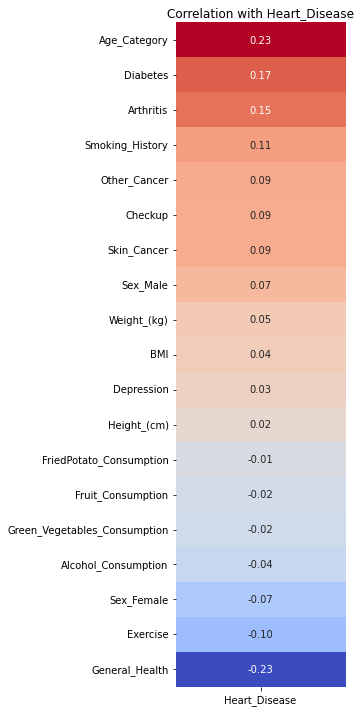

In [30]:
# Compute the correlation of each feature with the disease variables
disease_variables = ['Heart_Disease']

# Compute the correlation matrix
corr = data.corr()

# Create a single subplot for disease correlation
fig, ax = plt.subplots(figsize=(5, 10))

for disease in disease_variables:
    # Compute the correlation with the disease
    target_corr = corr[disease].drop(disease)

    # Sort correlation values in descending order
    target_corr_sorted = target_corr.sort_values(ascending=False)

    # Plot a heatmap of the correlations with the disease
    sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f', cbar=False, ax=ax)
    ax.set_title('Correlation with ' + disease)

plt.tight_layout()
plt.show()


### 🔍 Interpretation of Results:

- 📊 The correlation heatmaps show the correlation of each feature with the disease variables: Heart_Disease

- 🔎 From the heatmaps, we can observe the following:

  - ❤️ **Heart_Disease**: This condition shows a strong positive correlation with `Age_Category` and `Sex_Male`, and a negative correlation with `General health`, `Exercise` and `Sex_Female`.

In [31]:
# Re-import the dataset
data = pd.read_csv('CVD_cleaned.csv')

### <b>I <span style='color:#FF8551'>|</span> Missing Values</b>

In [32]:
# Check for missing values in each column
data.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

The dataset **does not contain any missing values**, which is great. The next step would typically be to look for any inconsistencies or outliers in the data. 🚀


### <b>III <span style='color:#FF8551'>|</span> Duplicates</b>

In [33]:
# Count duplicates
duplicate_count = data.duplicated().sum()

# Print the count
print("Number of duplicates:", duplicate_count)

Number of duplicates: 80


In [34]:
# Remove duplicate rows
data = data.drop_duplicates()

# <span style="color:#E888BB; font-size: 1%;">DATA PREPARATION</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/3683056/pexels-photo-3683056.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>DATA PREPARATION</span></b> </div>

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/3683041/pexels-photo-3683041.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> Feature Engineering </span></b> </div>

In [35]:
# BMI Category
data['BMI_Category'] = pd.cut(data['BMI'], bins=[0, 18.5, 24.9, 29.9, np.inf], labels=['Underweight', 'Normal weight', 'Overweight', 'Obesity'])

# Health Checkup Frequency
checkup_mapping = {'Within the past year': 4, 'Within the past 2 years': 2, 'Within the past 5 years': 1, '5 or more years ago': 0.2, 'Never': 0}
data['Checkup_Frequency'] = data['Checkup'].replace(checkup_mapping)

# Lifestyle Score
exercise_mapping = {'Yes': 1, 'No': 0}
smoking_mapping = {'Yes': -1, 'No': 0}
data['Lifestyle_Score'] = data['Exercise'].replace(exercise_mapping) - data['Smoking_History'].replace(smoking_mapping) + data['Fruit_Consumption']/10 + data['Green_Vegetables_Consumption']/10 - data['Alcohol_Consumption']/10

# Healthy Diet Score
data['Healthy_Diet_Score'] = data['Fruit_Consumption']/10 + data['Green_Vegetables_Consumption']/10 - data['FriedPotato_Consumption']/10

# Interaction Terms
data['Smoking_Alcohol'] = data['Smoking_History'].replace(smoking_mapping) * data['Alcohol_Consumption']
data['Checkup_Exercise'] = data['Checkup_Frequency'] * data['Exercise'].replace(exercise_mapping)

# Ratio of Height to Weight
data['Height_to_Weight'] = data['Height_(cm)'] / data['Weight_(kg)']

# Fruit and Vegetables Consumption Interaction
data['Fruit_Vegetables'] = data['Fruit_Consumption'] * data['Green_Vegetables_Consumption']

# Healthy_Diet_Lifestyle Interaction
data['HealthyDiet_Lifestyle'] = data['Healthy_Diet_Score'] * data['Lifestyle_Score']

# Alcohol_FriedPotato Interaction
data['Alcohol_FriedPotato'] = data['Alcohol_Consumption'] * data['FriedPotato_Consumption']

### Process:


- `BMI_Category`: 🍏🍔🧮 This variable categorizes the BMI (Body Mass Index) of each individual into one of four categories: 'Underweight', 'Normal weight', 'Overweight', and 'Obesity'. This is based on the following ranges: underweight is a BMI less than 18.5, normal weight is a BMI from 18.5 to 24.9, overweight is a BMI from 25 to 29.9, and obesity is a BMI of 30 or higher.

- `Checkup_Frequency`: 📅⚕️ This variable represents the frequency of health check-ups for each individual. It assigns numeric values to the different frequency categories, where a higher value represents more frequent check-ups.

- `Lifestyle_Score`: 💪🚬🥦🍷 This variable provides a composite score based on various lifestyle factors including exercise, smoking, fruit consumption, green vegetable consumption, and alcohol consumption. Each lifestyle factor is assigned a certain weight, with positive activities like exercise and healthy eating contributing positively to the score, and negative activities like smoking and alcohol consumption subtracting from the score.

- `Healthy_Diet_Score`: 🍇🥬🍟 This variable calculates a score based on the individual's diet. It considers the consumption of fruits, green vegetables, and fried potatoes. More consumption of fruits and green vegetables adds positively to the score, while consumption of fried potatoes subtracts from the score.

- `Smoking_Alcohol`: 🚬🍺 This interaction term represents the combination of smoking and alcohol consumption. It multiplies the mapped values of smoking history and alcohol consumption.

- `Checkup_Exercise`: 🏋️‍♀️🩺 This interaction term represents the combination of health check-up frequency and exercise habits. It multiplies the mapped values of health check-up frequency and exercise habits.

- `Height_to_Weight`: 👫⚖️ This variable calculates the ratio of an individual's height to their weight.

- `Fruit_Vegetables`: 🍏🥦 This interaction term represents the combined consumption of fruits and green vegetables. It multiplies the values of fruit consumption and green vegetable consumption.

- `Depression_Exercise`: 😞🏃‍♀️ This interaction term represents the combination of depression status and exercise habits. It multiplies the mapped values of depression status and exercise habits.

- `HealthyDiet_Lifestyle`: 🥗💃 This interaction term represents the combination of the Healthy Diet Score and the Lifestyle Score. It multiplies the values of these two scores.

- `Alcohol_FriedPotato`: 🍺🍟 This interaction term represents the combined consumption of alcohol and fried potatoes. It multiplies the values of alcohol consumption and fried potato consumption.


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/3683041/pexels-photo-3683041.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> Feature Preprocessing </span></b> </div>

In [36]:
# Mapping for Diabetes
diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0,
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)

# One-hot encoding for Sex
data = pd.get_dummies(data, columns=['Sex'])

# Convert remaining categorical variables with "Yes" and "No" values to binary format for correlation computation
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History','Exercise']

for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

# Ordinal encoding for General_Health, Age_Category,BMI_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}
data['General_Health'] = data['General_Health'].map(general_health_mapping)

bmi_mapping = {
    'Underweight': 0,
    'Normal weight': 1,
    'Overweight': 2,
    'Obesity': 3
}

data['BMI_Category'] = data['BMI_Category'].map(bmi_mapping).astype(int)

age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)

data = data.drop(["Checkup"],axis=1)

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/3683041/pexels-photo-3683041.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> Data Pipeline </span></b> </div>

In [37]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score

In [38]:
# Define the features and target
X = data.drop('Heart_Disease', axis=1)
y = data['Heart_Disease']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# <span style="color:#E888BB; font-size: 1%;">GRADIENT BOOSTING</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/3683056/pexels-photo-3683056.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>VOTING </span></b> </div>

In [39]:
#Voting
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base classifiers
random_forest = RandomForestClassifier(random_state=42)
adaboost = AdaBoostClassifier(random_state=42)
logistic_clf = LogisticRegression(random_state=42)

# Create a VotingClassifier with the base classifiers
voting_classifier = VotingClassifier(estimators=[('rf', random_forest), ('ada', adaboost), ('lr', logistic_clf)], voting='soft')

# Train the ensemble model
voting_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_vote = voting_classifier.predict(X_test)




In [40]:
print("Voting Accuracy-")
print(accuracy_score(y_test,y_pred_vote))
print("VOTING REPORT-")
print(classification_report(y_test, y_pred_vote))

Voting Accuracy-
0.9179823496073193
VOTING REPORT-
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56677
           1       0.68      0.00      0.01      5078

    accuracy                           0.92     61755
   macro avg       0.80      0.50      0.48     61755
weighted avg       0.90      0.92      0.88     61755



# <span style="color:#E888BB; font-size: 1%;">GRADIENT BOOSTING</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/3683056/pexels-photo-3683056.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>STACKING </span></b> </div>

In [42]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Define a list of different base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('gb', GradientBoostingClassifier(n_estimators=100)),
   ('xgb', XGBClassifier(n_estimators=100))
]

# Specify a meta-model (e.g., Logistic Regression)
meta_model = LogisticRegression()

# Create the stacking classifier
stack_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    stack_method='predict_proba'  # Use 'predict_proba' for logloss
)

# Train the stacking model
stack_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_stack = stack_model.predict(X_test)
y_score_stack = stack_model.predict_proba(X_test)[:, 1]


In [43]:
print("Stacking Accuracy-")
print(accuracy_score(y_test,y_pred_stack))
print("stacking REPORT-")
print(classification_report(y_test, y_pred_stack))

Stacking Accuracy-
0.9169298032547972
stacking REPORT-
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     56677
           1       0.48      0.11      0.18      5078

    accuracy                           0.92     61755
   macro avg       0.70      0.55      0.57     61755
weighted avg       0.89      0.92      0.89     61755



# <span style="color:#E888BB; font-size: 1%;">GRADIENT BOOSTING</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/3683056/pexels-photo-3683056.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>BAGGING </span></b> </div>

### RANDOM FOREST

In [44]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

# Define the model with default hyperparameters
model = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters as needed

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rand = model.predict(X_test)
y_score_rand = model.predict_proba(X_test)[:, 1]  # Random Forest does not have a predict_proba method by default


In [45]:
print("random forest Accuracy-")
print(accuracy_score(y_test,y_pred_rand))
print("random forest REPORT-")
print(classification_report(y_test, y_pred_rand))

random forest Accuracy-
0.9175289450246944
random forest REPORT-
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56677
           1       0.48      0.03      0.06      5078

    accuracy                           0.92     61755
   macro avg       0.70      0.52      0.51     61755
weighted avg       0.88      0.92      0.88     61755



### EXTRA TREES

In [46]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create an instance of the Extra Trees Classifier
extra_trees = ExtraTreesClassifier(n_estimators=100)

# Fit the Extra Trees model to your training data
extra_trees.fit(X_train, y_train)

# Make predictions on the test data
y_pred_ext = extra_trees.predict(X_test)


In [47]:
print("Extra Trees Accuracy-")
print(accuracy_score(y_test,y_pred_rand))
print("Extra Trees REPORT-")
print(classification_report(y_test, y_pred_rand))

Extra Trees Accuracy-
0.9175289450246944
Extra Trees REPORT-
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56677
           1       0.48      0.03      0.06      5078

    accuracy                           0.92     61755
   macro avg       0.70      0.52      0.51     61755
weighted avg       0.88      0.92      0.88     61755



# <span style="color:#E888BB; font-size: 1%;">GRADIENT BOOSTING</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/3683056/pexels-photo-3683056.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>BOOSTING</span></b> </div>

### XGBOOST

In [48]:
from math import sqrt
# Define the model with default hyperparameters
model = XGBClassifier(
    eval_metric='logloss', # use logloss to evaluate performance
    use_label_encoder=False # to avoid warning message
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xg = model.predict(X_test)
y_score_xg = model.predict_proba(X_test)[:,1]

In [49]:
print("XGBoost Accuracy-")
print(accuracy_score(y_test,y_pred_xg))
print("XGBoost REPORT-")
print(classification_report(y_test, y_pred_xg))

XGBoost Accuracy-
0.9182090518986317
XGBoost REPORT-
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56677
           1       0.53      0.05      0.09      5078

    accuracy                           0.92     61755
   macro avg       0.72      0.52      0.52     61755
weighted avg       0.89      0.92      0.89     61755



### LightGBM

In [50]:
#Light GBM
from lightgbm import LGBMClassifier


# Create the LightGBM model
model = LGBMClassifier(  # adjust class weights due to class imbalance
    objective='binary',  # specify binary classification objective
    metric='binary_logloss',  # use logloss to evaluate performance
    boosting_type='gbdt',  # gradient boosting decision tree
    use_missing=False,  # avoid missing value handling warning
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_GBM = model.predict(X_test)
y_score_GBM = model.predict_proba(X_test)[:, 1]

[LightGBM] [Info] Number of positive: 19893, number of negative: 227126
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2113
[LightGBM] [Info] Number of data points in the train set: 247019, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080532 -> initscore=-2.435137
[LightGBM] [Info] Start training from score -2.435137


In [51]:
print("LightGBM Accuracy-")
print(accuracy_score(y_test,y_pred_GBM))
print("LightGBM REPORT-")
print(classification_report(y_test, y_pred_GBM))

LightGBM Accuracy-
0.9185652983564084
LightGBM REPORT-
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56677
           1       0.61      0.03      0.05      5078

    accuracy                           0.92     61755
   macro avg       0.76      0.51      0.50     61755
weighted avg       0.89      0.92      0.88     61755



### CatBoost

In [52]:
from catboost import CatBoostClassifier

# Define the CatBoost model with default hyperparameters
model = CatBoostClassifier(  # adjust class weights due to class imbalance
    custom_metric=['Logloss'],  # use logloss to evaluate performance
    verbose=False  # to avoid warning messages
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_cat = model.predict(X_test)
y_score_cat = model.predict_proba(X_test)[:, 1]

In [53]:
print("CatBoost Accuracy-")
print(accuracy_score(y_test,y_pred_cat))
print("CatBoost REPORT-")
print(classification_report(y_test, y_pred_cat))

CatBoost Accuracy-
0.917852805440855
CatBoost REPORT-
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56677
           1       0.51      0.05      0.09      5078

    accuracy                           0.92     61755
   macro avg       0.71      0.52      0.52     61755
weighted avg       0.89      0.92      0.89     61755



# <span style="color:#E888BB; font-size: 1%;">MODEL EVALUATION</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/3683056/pexels-photo-3683056.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>MODEL EVALUATION </span></b> </div>



### 🔍 Interpretation of Results:

**Precision**: Out of all the instances that the model predicted as positive, how many are actually positive. A precision score of 0.97 for class 0 🚫 means that 97% of the instances that the model predicted as class 0 are actually class 0. Similarly, a precision score of 0.21 for class 1 ✅ means that only 21% of the instances that the model predicted as class 1 are actually class 1.

**Recall**: Out of all the actual positive instances, how many the model correctly identified. A recall score of 0.74 for class 0 🚫 means that the model correctly identified 74% of all actual class 0 instances. Similarly, a recall score of 0.77 for class 1 ✅ means that the model correctly identified 77% of all actual class 1 instances.

**F1-score**: The harmonic mean of precision and recall. An F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It's a good way to summarize the evaluation of the model with a single number. 🎯

**Support**: The number of actual instances for each class in the test data. 🔢

**Accuracy**: The ratio of correct predictions to total predictions. An accuracy of 0.74 means that the model correctly predicted the class for 74% of all instances. ✔️

**Macro avg**: The average precision, recall, or F1-score without considering the proportion for each class. 📊

**Weighted avg**: The average precision, recall, or F1-score considering the proportion for each class. ⚖️

<div class="warning" style="background-color: #DDE6ED; border-left: 6px solid #27374D;font-size: 100%; padding: 10px;">
<h3 style="color: #27374D; font-size: 18px; margin-top: 0; margin-bottom: 10px;">🔎  Here are some observations:</h3>
    
From the report, we can see that the model has high precision but lower recall for class 0 (probably the negative class), and low precision but higher recall for class 1 (probably the positive class). This means the model is more conservative in predicting class 1, but when it does, it's more likely to be correct. On the other hand, it predicts class 0 more frequently, but a significant number of them are false positives.

</div>

> The overall accuracy of the model is 0.74, which means it makes the correct prediction for 74% of the instances. However, the macro average F1 score is only 0.58, indicating that the model's performance isn't as good when we consider both classes equally, regardless of their imbalance.


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/3683041/pexels-photo-3683041.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> Confusion Matrix </span></b> </div>

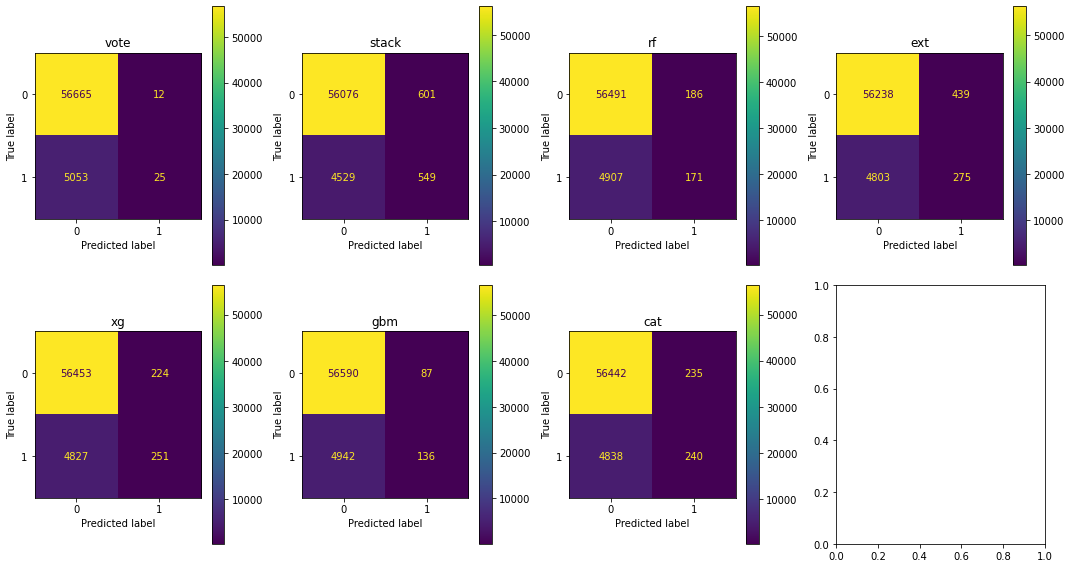

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# List of models and corresponding names

model_names = ['vote','stack', 'rf', 'ext', 'xg', 'gbm', 'cat']
y_list=[y_pred_vote,y_pred_stack ,y_pred_rand, y_pred_ext, y_pred_xg, y_pred_GBM, y_pred_cat]

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

for i, model in enumerate(y_list):
    # Make predictions on the test set
    y_pred = model

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a ConfusionMatrixDisplay object
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    # Plot the confusion matrix in the i-th subplot
    disp.plot(ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(model_names[i])

# Adjust subplot layout
plt.tight_layout()
plt.show()


### 🔍 Interpretation of Results:

**True negatives (TN): 41881** - The model correctly predicted class 0 🚫 for these instances.

**False positives (FP): 14796** - The model incorrectly predicted class 1 ✅ for these instances, which are actually class 0 🚫.

**False negatives (FN): 1172** - The model incorrectly predicted class 0 🚫 for these instances, which are actually class 1 ✅.

**True positives (TP): 3906** - The model correctly predicted class 1 ✅ for these instances.

<div class="warning" style="background-color: #E6ED; border-left: 6px solid #27374D;font-size: 100%; padding: 10px;">
<h3 style="color: #27374D; font-size: 18px; margin-top: 0; margin-bottom: 10px;">🔎  Here are some observations:</h3>
    
This tells us that the model is reasonably good at identifying true negatives (class 0), but has quite a lot of false positives, i.e., it's predicting class 1 for many instances that are actually class 0. The model has a relatively small number of false negatives and a smaller number of true positives, indicating that it's more conservative in predicting class 1.

</div>

